In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/dcu/Group-Project


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [89]:
from src.featutils import aggregate_features_from_folder
from src.features.common import feature_bluetooth_histogram, postproc_bluetooth_histogram

train_dir = "data/tc4tl_training_data_v1/tc4tl/data/train/"
train_key = pd.read_csv("data/tc4tl_training_data_v1/tc4tl/docs/tc4tl_train_key.tsv", sep="\t")
test_dir = "data/tc4tl_data_v5/tc4tl/data/test/"
test_key = pd.read_csv("data/tc4tl_test_key/tc4tl/docs/tc4tl_test_key.tsv", sep="\t")
dev_dir = "data/tc4tl_data_v5/tc4tl/data/dev/"
dev_key = pd.read_csv("data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_key.tsv", sep="\t")

trainset, pipe = aggregate_features_from_folder(train_dir, train_key, feat_fn=feature_bluetooth_histogram,
                               postproc_fn=postproc_bluetooth_histogram, verbose=True, testing=0,
                               tunables={})
devset, _ = aggregate_features_from_folder(dev_dir, dev_key, feat_fn=feature_bluetooth_histogram, pipe=pipe,
                               postproc_fn=postproc_bluetooth_histogram, verbose=True, testing=0,
                               tunables={})
testset, _ = aggregate_features_from_folder(test_dir, test_key, feat_fn=feature_bluetooth_histogram, pipe=pipe,
                               postproc_fn=postproc_bluetooth_histogram, verbose=True, testing=0,
                               tunables={})

100%|██████████| 8423/8423 [00:07<00:00, 1059.53it/s]


## PCA

In [90]:
trainset.columns[trainset.columns != 'Distance']

Index(['Hist_-99.49', 'Hist_-98.48', 'Hist_-97.46', 'Hist_-96.45',
       'Hist_-95.43', 'Hist_-94.42', 'Hist_-93.41', 'Hist_-92.39',
       'Hist_-91.38', 'Hist_-90.36', 'Hist_-89.35', 'Hist_-88.33',
       'Hist_-87.32', 'Hist_-86.30', 'Hist_-85.29', 'Hist_-84.28',
       'Hist_-83.26', 'Hist_-82.25', 'Hist_-81.23', 'Hist_-80.22',
       'Hist_-79.20', 'Hist_-78.19', 'Hist_-77.17', 'Hist_-76.16',
       'Hist_-75.14', 'Hist_-74.13', 'Hist_-73.12', 'Hist_-72.10',
       'Hist_-71.09', 'Hist_-70.07', 'Hist_-69.06', 'Hist_-68.04',
       'Hist_-67.03', 'Hist_-66.01', 'Hist_-65.00', 'Hist_-63.99',
       'Hist_-62.97', 'Hist_-61.96', 'Hist_-60.94', 'Hist_-59.93',
       'Hist_-58.91', 'Hist_-57.90', 'Hist_-56.88', 'Hist_-55.87',
       'Hist_-54.86', 'Hist_-53.84', 'Hist_-52.83', 'Hist_-51.81',
       'Hist_-50.80', 'Hist_-49.78', 'Hist_-48.77', 'Hist_-47.75',
       'Hist_-46.74', 'Hist_-45.72', 'Hist_-44.71', 'Hist_-43.70',
       'Hist_-42.68', 'Hist_-41.67', 'Hist_-40.65', 'Hist_-39.

In [91]:
from sklearn.decomposition import PCA

n_components = 2
feat_cols = trainset.loc[:, trainset.columns != "Distance"].columns
pca = PCA(n_components)
trpca, tr_y = pca.fit_transform(trainset[feat_cols]), trainset["Distance"].values
depca, de_y = pca.fit_transform(devset[feat_cols]), devset["Distance"].values
tepca, te_y = pca.fit_transform(testset[feat_cols]), testset["Distance"].values

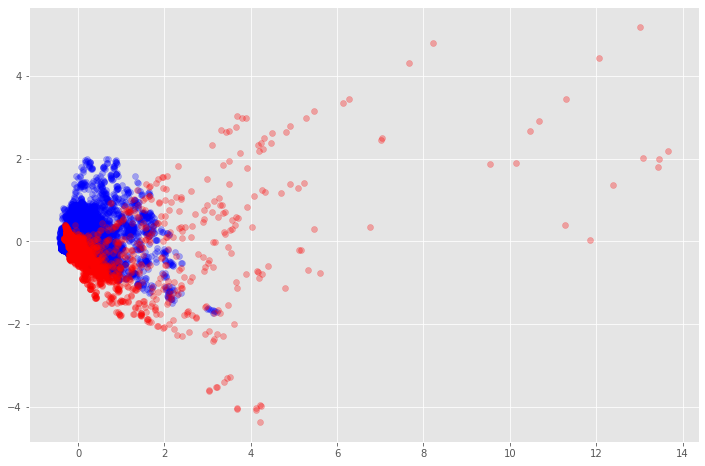

In [92]:
plt.figure(figsize=(12, 8))
plt.scatter(trpca[:, 0], trpca[:, 1], c="blue", alpha=0.3)
plt.scatter(tepca[:, 0], tepca[:, 1], c="red", alpha=0.3)

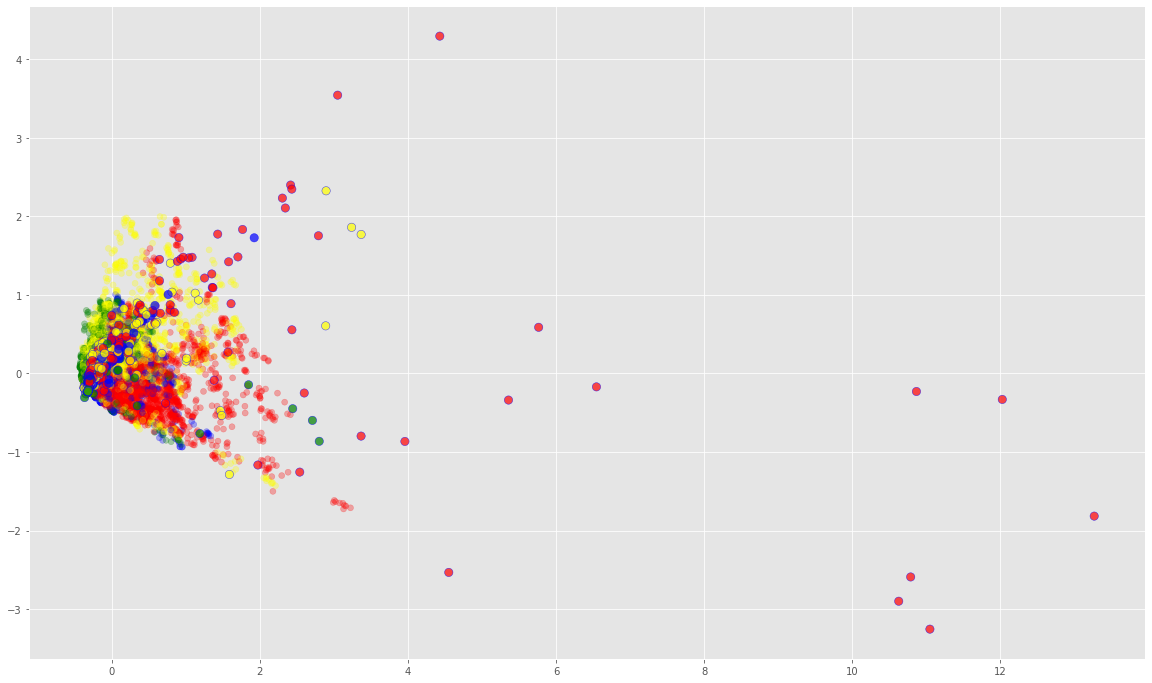

In [94]:
colors = {1.2: "green", 1.8: "yellow", 3: "blue", 4.5: "red" }
trcolors = [ colors[float(label)] for label in tr_y ]
decolors = [ colors[float(label)] for label in de_y]
plt.figure(figsize=(20, 12))
plt.scatter(trpca[:, 0], trpca[:, 1], c=trcolors, alpha=0.3)
plt.scatter(depca[:, 0], depca[:, 1], c=decolors, alpha=0.7, edgecolors='b', s=70);

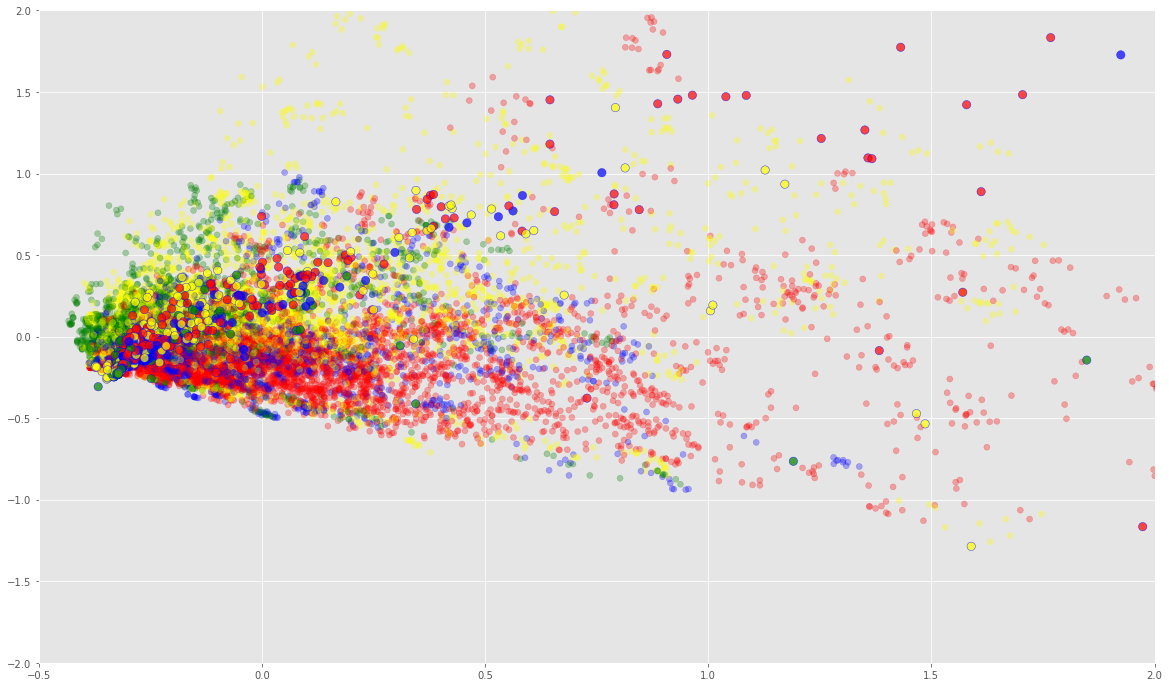

In [95]:
plt.figure(figsize=(20, 12))
plt.scatter(trpca[:, 0], trpca[:, 1], c=trcolors, alpha=0.3)
plt.scatter(depca[:, 0], depca[:, 1], c=decolors, alpha=0.7, edgecolors='b', s=70)
plt.xlim(-.5, 2.)
plt.ylim(-2, 2.);

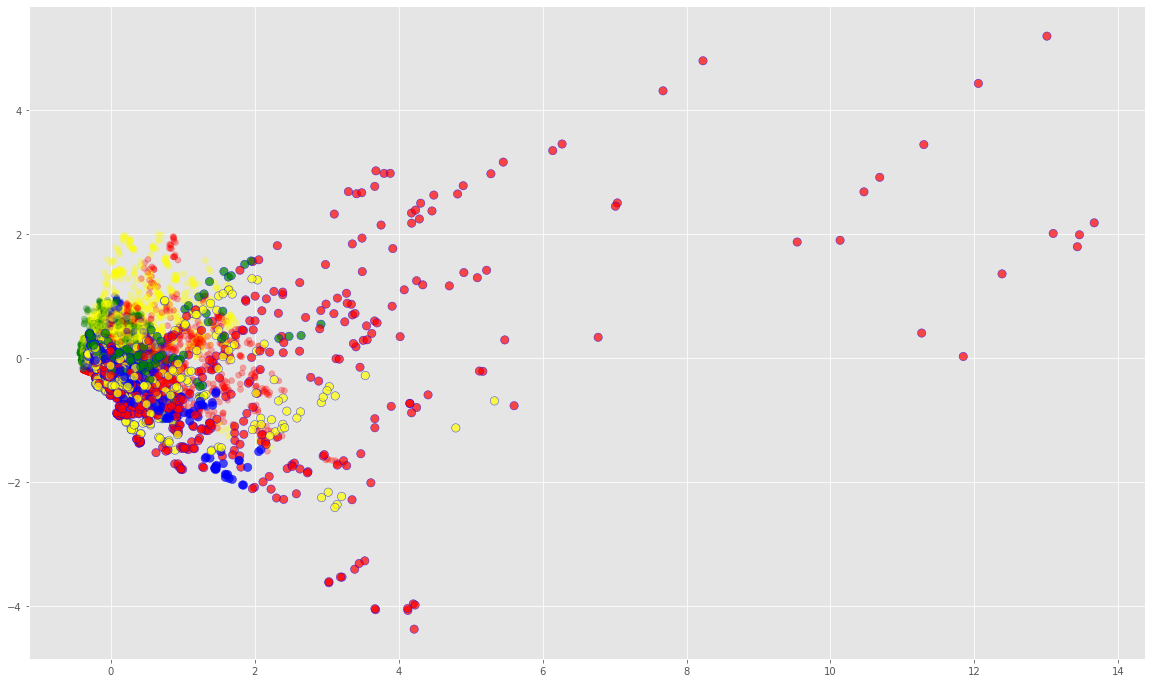

In [97]:
colors = {1.2: "green", 1.8: "yellow", 3: "blue", 4.5: "red" }
tecolors = [ colors[float(label)] for label in te_y]
plt.figure(figsize=(20, 12))
plt.scatter(trpca[:, 0], trpca[:, 1], c=trcolors, alpha=0.3)
plt.scatter(tepca[:, 0], tepca[:, 1], c=tecolors, alpha=0.7, edgecolors='b', s=70)

(-2.0, 2.0)

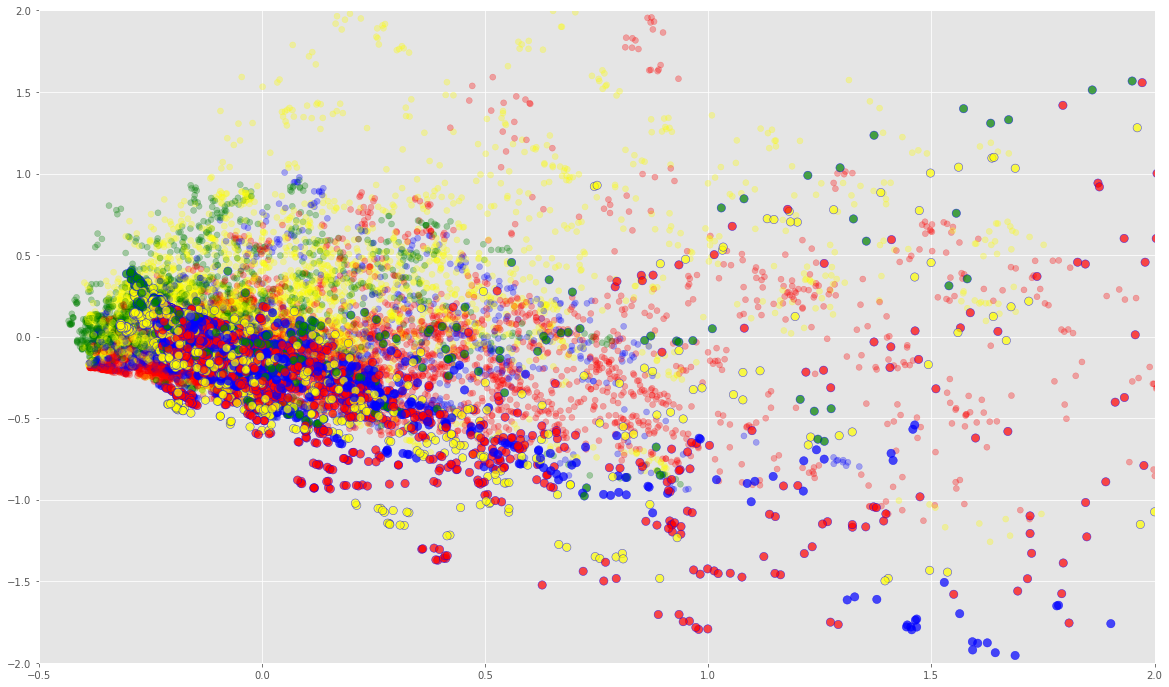

In [98]:
colors = {1.2: "green", 1.8: "yellow", 3: "blue", 4.5: "red" }
tecolors = [ colors[float(label)] for label in te_y]
plt.figure(figsize=(20, 12))
plt.scatter(trpca[:, 0], trpca[:, 1], c=trcolors, alpha=0.3)
plt.scatter(tepca[:, 0], tepca[:, 1], c=tecolors, alpha=0.7, edgecolors='b', s=70)
plt.xlim(-.5, 2.)
plt.ylim(-2, 2.)

## PCA in Distance Space

In [99]:
hyperparams = {'Friis': {'Gr_dBi': -3.464561870341017,
  'Gt_dBi': 0.20597726357898227,
  'L': 2.1516474937337478,
  'Pt_dBm': 17.87357752441881,
  'f': 2403652319.6880946,
  'n': 2.930021915116384},
 'LinearApprox': {'N': 2.915682422144732, 'TX': 11.682119667187617},
 'LogNormal': {'Gr_dBi': -5.125678676280162,
  'Gt_dBi': -4.108101510558816,
  'L': 0.7656207801852686,
  'Pt_dBm': -1.8532796868212498,
  'f': 2463516474.7305307,
  'n': 3.7519240746066163}}

In [100]:
from src.featutils import aggregate_features_from_folder
from src.features.radioprop import extract_features, postproc_feature_dicts

train_dir = "data/tc4tl_training_data_v1/tc4tl/data/train/"
train_key = pd.read_csv("data/tc4tl_training_data_v1/tc4tl/docs/tc4tl_train_key.tsv", sep="\t")
test_dir = "data/tc4tl_data_v5/tc4tl/data/test/"
test_key = pd.read_csv("data/tc4tl_test_key/tc4tl/docs/tc4tl_test_key.tsv", sep="\t")
dev_dir = "data/tc4tl_data_v5/tc4tl/data/dev/"
dev_key = pd.read_csv("data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_key.tsv", sep="\t")

trainset, pipe = aggregate_features_from_folder(train_dir, train_key, feat_fn=extract_features,
                               postproc_fn=postproc_feature_dicts, verbose=True, testing=0,
                               tunables=hyperparams)
devset, _ = aggregate_features_from_folder(dev_dir, dev_key, feat_fn=extract_features, pipe=pipe,
                               postproc_fn=postproc_feature_dicts, verbose=True, testing=0,
                               tunables=hyperparams)
testset, _ = aggregate_features_from_folder(test_dir, test_key, feat_fn=extract_features, pipe=pipe,
                               postproc_fn=postproc_feature_dicts, verbose=True, testing=0,
                               tunables=hyperparams)

Post-processing: zzzgwsci_tc4tl20.csv: 100%|██████████| 8423/8423 [00:11<00:00, 716.75it/s]


In [101]:
from sklearn.decomposition import PCA

n_components = 2
feat_cols = trainset.loc[:, trainset.columns != "DistanceFloat"].columns
pca = PCA(n_components)
trpca, tr_y = pca.fit_transform(trainset[feat_cols]), trainset["DistanceFloat"].values
depca, de_y = pca.fit_transform(devset[feat_cols]), devset["DistanceFloat"].values
tepca, te_y = pca.fit_transform(testset[feat_cols]), testset["DistanceFloat"].values

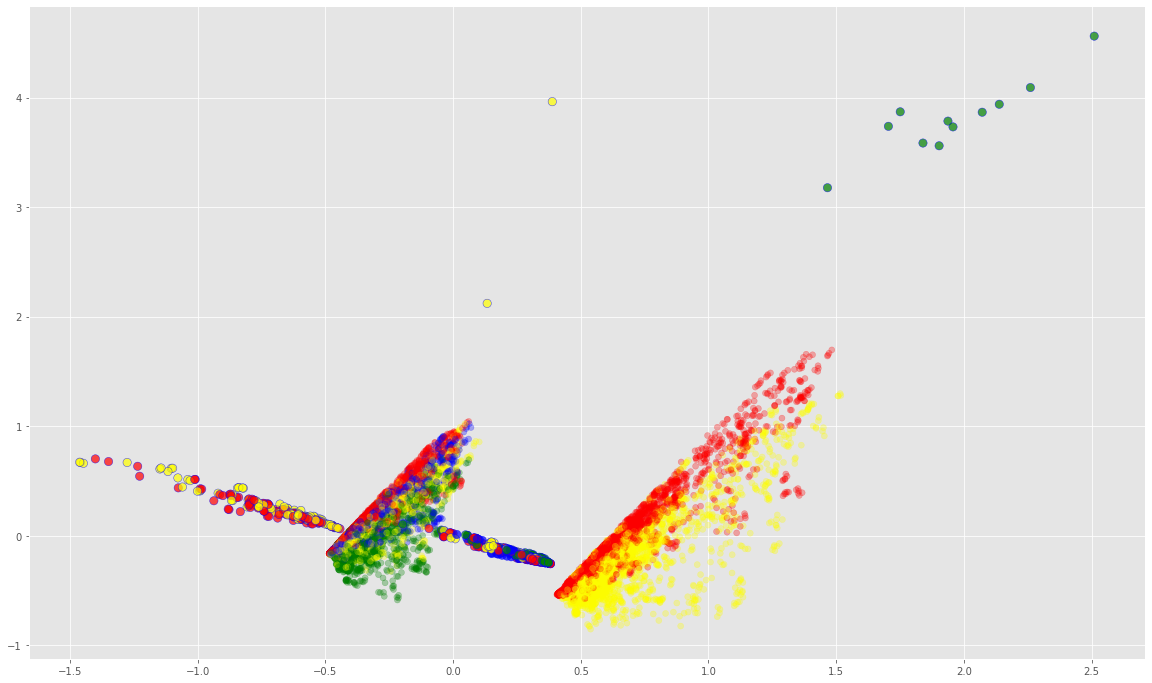

In [102]:
colors = {1.2: "green", 1.8: "yellow", 3: "blue", 4.5: "red" }
trcolors = [ colors[float(label)] for label in tr_y ]
decolors = [ colors[float(label)] for label in de_y]
plt.figure(figsize=(20, 12))
plt.scatter(trpca[:, 0], trpca[:, 1], c=trcolors, alpha=0.3)
plt.scatter(depca[:, 0], depca[:, 1], c=decolors, alpha=0.7, edgecolors='b', s=70)
#plt.xlim(-.5, 2.)
#plt.ylim(-2, 2.)

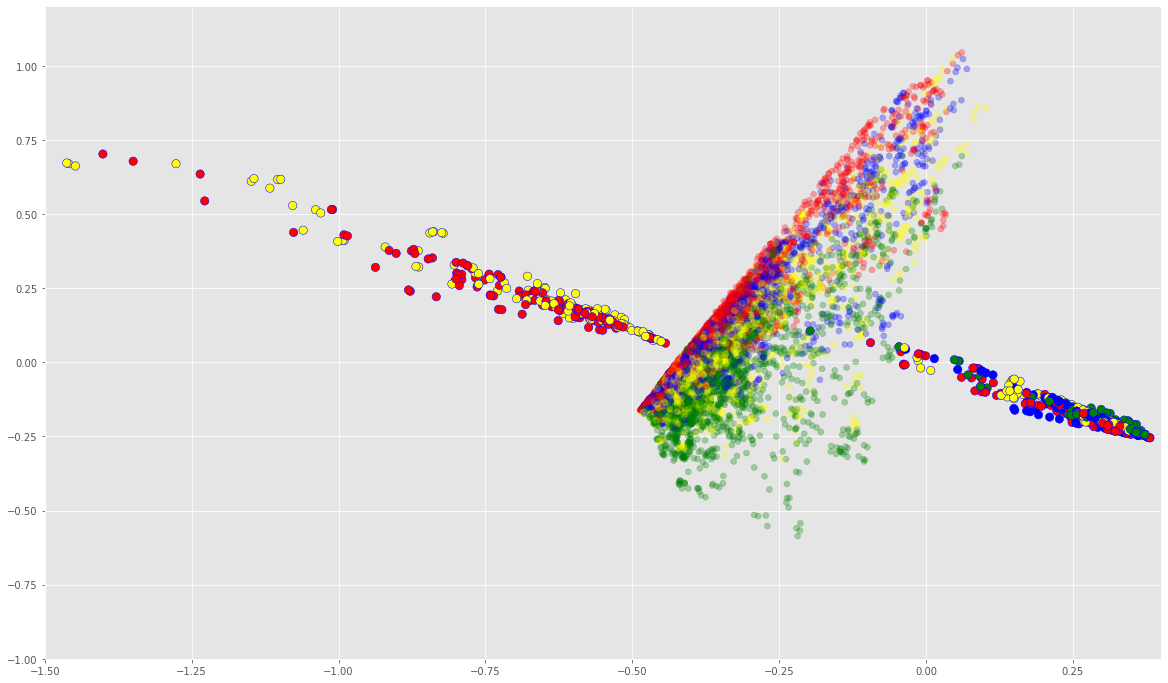

In [103]:
plt.figure(figsize=(20, 12))
plt.scatter(trpca[:, 0], trpca[:, 1], c=trcolors, alpha=0.3)
plt.scatter(depca[:, 0], depca[:, 1], c=decolors, alpha=1., edgecolors='b', s=70)
plt.xlim(-1.5, .4)
plt.ylim(-1, 1.2);

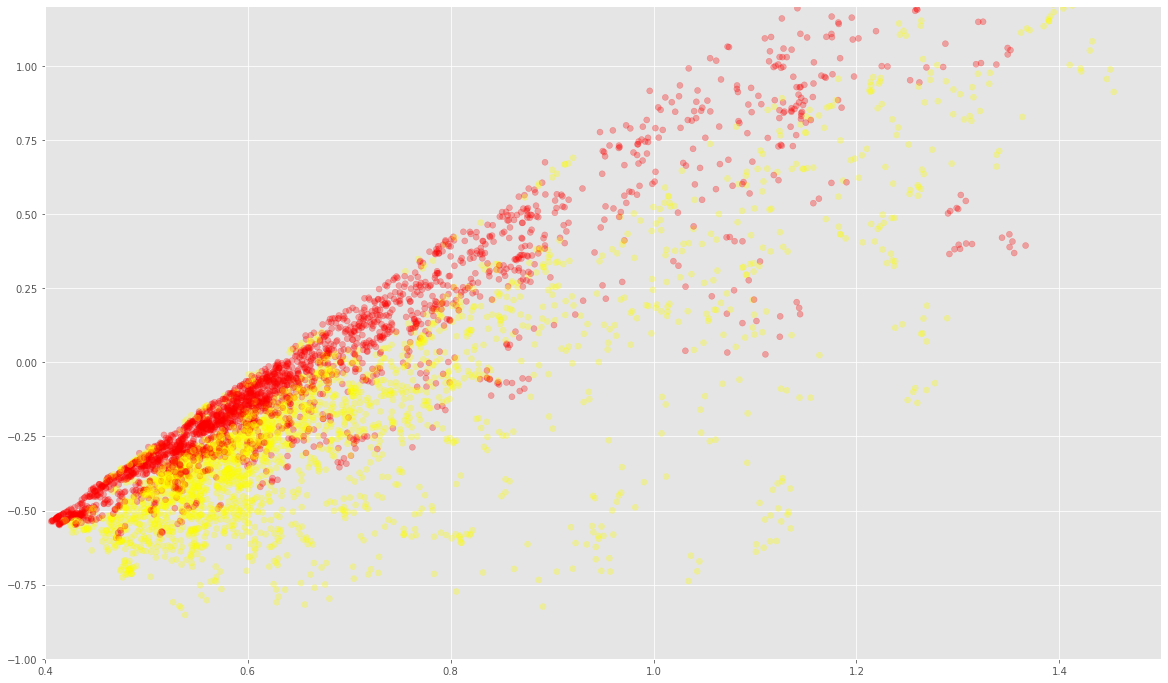

In [104]:
plt.figure(figsize=(20, 12))
plt.scatter(trpca[:, 0], trpca[:, 1], c=trcolors, alpha=0.3)
plt.scatter(depca[:, 0], depca[:, 1], c=decolors, alpha=0.7, edgecolors='b', s=120)
plt.xlim(.4, 1.5)
plt.ylim(-1, 1.2);